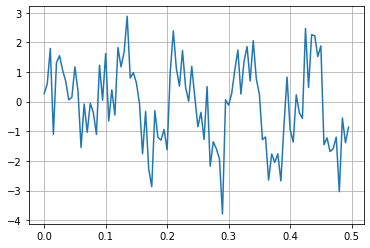

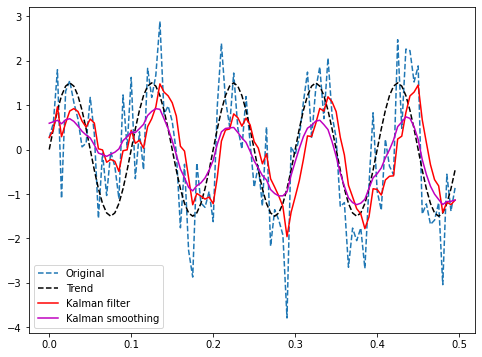

In [1]:
import numpy as np
import matplotlib.pyplot as plt

G = np.array([[1]])
F = np.array([[1]])
W = np.array([[1]])
V = np.array([[10]])
T = 100

m0 = np.array([[0]])
C0 = np.array([[1e7]])

#Array for Result
m = np.zeros((T, 1))
C = np.zeros((T, 1, 1))
s = np.zeros((T, 1))
S = np.zeros((T, 1, 1))

def kalman_filter(m, C, y, G=G, F=F, W=W, V=V):
    """
    Kalman Filter
    m: Mean of the Filtering Distribution at t-1
    C: Variance-CoVariance Matrix of the Filtering Distribution at t-1
    y: Observation value at t
    """
    a = G @ m
    R = G @ C @ G.T + W
    f = F @ a
    Q = F @ R @ F.T + V

    K = (np.linalg.solve(Q.T, F @ R.T)).T
    # K = R @ F.T @ np.linalg.inv(Q)

    m = a + K @ (y - f)
    C = R - K @ F @ R
    return m, C

def kalman_smoothing(s, S, m, C, G=G, W=W):
    """
    Kalman smoothing
    """
    # Evaluation of the Predicted Distribution Parametere ahead by One-term
    a = G @ m
    R = G @ C @ G.T + W

    # Evaluation of Smoothed Gain
    A = np.linalg.solve(R.T, G @ C.T).T
    # A = C @ G.T @ np.linalg.inv(R)

    # Update of State
    s = m + A @ (s - a)
    S = C + A @ (S - R) @ A.T
    return s, S

samplerate = 200
x    = np.arange(0, 100) / samplerate
yt   = 1.5*np.sin(10*2*np.pi*x)
data = np.random.normal(loc=0, scale=1, size=len(x)) + yt
plt.plot(x,data)
plt.grid()
plt.show()

#Execute Karmal Filtering 
for t in range(T):
    if t == 0:
        m[t], C[t] = kalman_filter(m0, C0, data[t:t+1])
    else:
        m[t], C[t] = kalman_filter(m[t-1:t], C[t-1:t], data[t:t+1])

#Execute Karman Smoothing
for t in range(T):
    t = T - t - 1
    if t == T - 1:
        s[t] = m[t]
        S[t] = C[t]
    else:
        s[t], S[t] = kalman_smoothing(s[t+1], S[t+1], m[t], C[t])

plt.figure(figsize=(8,6))
plt.plot(x,data,'--')
plt.plot(x,yt,'k--')
plt.plot(x,m,'r')
plt.plot(x,s,'m')
plt.legend(['Original','Trend','Kalman filter','Kalman smoothing'])
plt.show()